In [ ]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 27 kB/s 
     |████████████████████████████████| 503 kB 63.8 MB/s 
     |████████████████████████████████| 50 kB 7.6 MB/s 
     |████████████████████████████████| 3.8 MB 52.1 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=5b6d1974185c87da3f6b656fcf38093b809ffadc346db30e3a1187f125b7581e
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting un

In [ ]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [ ]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

In [ ]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
def findZone(x1, y1, x2, y2):
  dx = x2 - x1
  dy = y2 - y1
  absdy = abs(dy)
  absdx = abs(dx)

  if(absdx > absdy):
    if(dx >= 0 and dy >= 0): return 0
    elif(dx <= 0 and dy >= 0): return 3
    elif(dx <= 0 and dy <= 0): return 4
    elif(dx >= 0 and dy <= 0): return 7
  else:
    if(dx >= 0 and dy >= 0): return 1
    elif(dx <= 0 and dy >= 0): return 2
    elif(dx <= 0 and dy <= 0): return 5
    elif(dx >= 0 and dy <= 0): return 6
  

In [ ]:
def convertZone(x, y, zone):
  if(zone == 0):
    return x, y
  elif(zone == 1):
    return y, x
  elif(zone == 2):
    return -y, x
  elif(zone == 3):
    return -x, y
  elif(zone == 4):
    return -x, -y
  elif(zone == 5):
    return -y, -x
  elif(zone == 6):
    return y, -x
  elif(zone == 7):
    return x, -y

In [ ]:
def midpoint(x1, y1, x2, y2):
  zone = findZone(x1, y1, x2, y2)
  x1_new, y1_new = convertBack(x1, y1, zone)
  x2_new, y2_new = convertBack(x2, y2, zone)
  
  dx = x2_new - x1_new
  dy = y2_new - y1_new
  ne = 2*(dy-dx)
  e = 2*dy
  d = 2*dy - dx
  
  gl.glColor3f(0.17, 0.23, 0.345)
  gl.glPointSize(8)
  gl.glBegin(gl.GL_POINTS)
  while(x1_new < x2_new):
    x1_new += 0.001

    if(d > 0):
      y1_new += 0.001
      d += ne
    else:
      d += e
    
    temp_x, temp_y = convertZone(x1_new, y1_new, zone)
    gl.glVertex2f(temp_x, temp_y)
  gl.glEnd()

In [ ]:
def convertBack(x, y, zone):
  if(zone == 0):
    return x, y
  elif(zone == 1):
    return y, x
  elif(zone == 2):
    return y, -x
  elif(zone == 3):
    return -x, y
  elif(zone == 4):
    return -x, -y
  elif(zone == 5):
    return -y, -x
  elif(zone == 6):
    return -y, x
  elif(zone == 7):
    return x, -y

In [ ]:
def digit(num, direction):
  # 0
  if(num == 0):
    midpoint(0.1*direction, 0.4, 0.4*direction, 0.4)
    midpoint(0.1*direction, 0.4, 0.1*direction, -0.4)
    midpoint(0.4*direction, 0.4, 0.4*direction, -0.4)
    midpoint(0.1*direction, -0.4, 0.4*direction, -0.4)
  
  # 1
  elif(num == 1):
    if(direction == 1):
      midpoint(0.4, 0.4, 0.4, -0.4)
      midpoint(0.1, 0.2, 0.4, 0.4)
    else:
      midpoint(-0.1, 0.4, -0.1, -0.4)
      midpoint(-0.4, 0.2, -0.1, 0.4)

  # 2
  elif(num == 2):
    midpoint(0.1*direction, 0.4, 0.4*direction, 0.4)
    midpoint(0.4*direction, 0, 0.1*direction, 0)
    midpoint(0.1*direction, -0.4, 0.4*direction, -0.4)
    
    if(direction == 1):
      midpoint(0.4, 0.4, 0.4, 0)
      midpoint(0.1, 0, 0.1, -0.4)
    else:
      midpoint(-0.1, 0.4, -0.1, 0)
      midpoint(-0.4, 0, -0.4, -0.4)
  
  # 3
  elif(num == 3):
    midpoint(0.1*direction, 0.4, 0.4*direction, 0.4)
    midpoint(0.4*direction, 0, 0.1*direction, 0)
    midpoint(0.1*direction, -0.4, 0.4*direction, -0.4)

    if(direction == 1):
      midpoint(0.4, 0.4, 0.4, 0)
      midpoint(0.4, 0, 0.4, -0.4)
    else:
      midpoint(-0.1, 0.4, -0.1, 0)
      midpoint(-0.1, 0, -0.1, -0.4)
    
  # 4
  elif(num == 4):
    midpoint(0.4*direction, 0, 0.1*direction, 0)

    if(direction == 1):
      midpoint(0.4, 0.4, 0.4, -0.4)
      midpoint(0.1, 0, 0.4, 0.4)
    else:
      midpoint(-0.1, 0.4, -0.1, -0.4)
      midpoint(-0.4, 0, -0.1, 0.4)

  # 5
  elif(num == 5):
    midpoint(0.1*direction, 0.4, 0.4*direction, 0.4)
    midpoint(0.4*direction, 0, 0.1*direction, 0)
    midpoint(0.1*direction, -0.4, 0.4*direction, -0.4)
    
    if(direction == 1):
      midpoint(0.1, 0, 0.1, 0.4)
      midpoint(0.4, 0, 0.4, -0.4)
    else:
      midpoint(-0.1, 0, -0.1, -0.4)
      midpoint(-0.4, 0, -0.4, 0.4)
  
  # 6
  elif(num == 6):
    midpoint(0.1*direction, 0.4, 0.4*direction, 0.4)
    midpoint(0.4*direction, 0, 0.1*direction, 0)
    midpoint(0.1*direction, -0.4, 0.4*direction, -0.4)

    if(direction == 1):
      midpoint(0.4, 0, 0.4, -0.4)
      midpoint(0.1, 0, 0.1, 0.4)
      midpoint(0.1, 0, 0.1, -0.4)
    else:
      midpoint(-0.1, 0, -0.1, -0.4)
      midpoint(-0.4, 0, -0.4, 0.4)
      midpoint(-0.4, 0, -0.4, -0.4)

  # 7
  elif(num == 7):
    midpoint(0.1*direction, 0.4, 0.4*direction, 0.4)

    if(direction == 1):
      midpoint(0.1, -0.4, 0.4, 0.4)
    else:
      midpoint(-0.4, -0.4, -0.1, 0.4)
  
  # 8
  elif(num == 8):
    midpoint(0.1*direction, 0.4, 0.4*direction, 0.4)
    midpoint(0.4*direction, 0, 0.1*direction, 0)
    midpoint(0.1*direction, -0.4, 0.4*direction, -0.4)

    if(direction == 1):
      midpoint(0.4, 0.4, 0.4, 0)
      midpoint(0.4, 0, 0.4, -0.4)
      midpoint(0.1, 0, 0.1, 0.4)
      midpoint(0.1, 0, 0.1, -0.4)
    else:
      midpoint(-0.1, 0.4, -0.1, 0)
      midpoint(-0.1, 0, -0.1, -0.4)
      midpoint(-0.4, 0, -0.4, 0.4)
      midpoint(-0.4, 0, -0.4, -0.4)

  # 9
  elif(num == 9):
    midpoint(0.1*direction, 0.4, 0.4*direction, 0.4)
    midpoint(0.4*direction, 0, 0.1*direction, 0)
    midpoint(0.1*direction, -0.4, 0.4*direction, -0.4)

    if(direction == 1):
      midpoint(0.4, 0.4, 0.4, 0)
      midpoint(0.4, 0, 0.4, -0.4)
      midpoint(0.1, 0, 0.1, 0.4)
    else:
      midpoint(-0.1, 0.4, -0.1, 0)
      midpoint(-0.1, 0, -0.1, -0.4)
      midpoint(-0.4, 0, -0.4, 0.4)

20101177



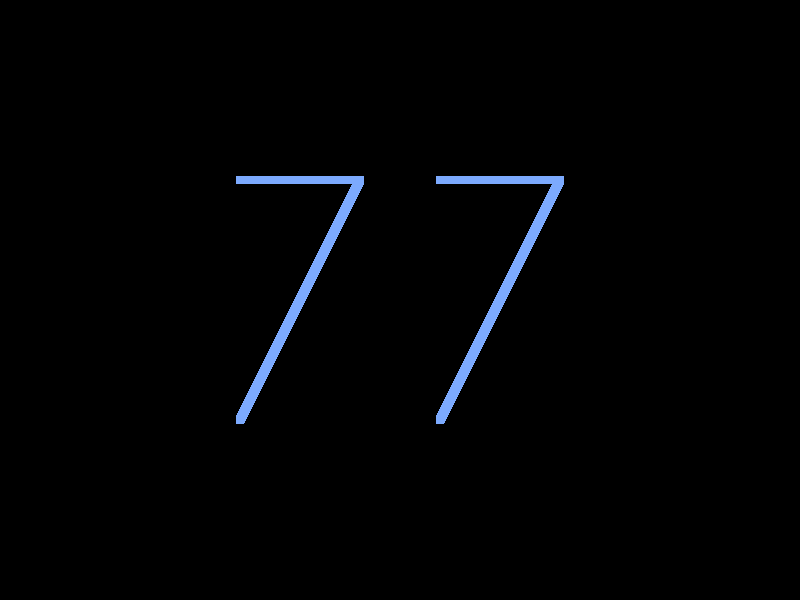

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
# Direction = -1 means left digit, 1 means right digit
inp = input()
if(len(inp) == 8):
  digit(int(inp[6]), -1)
  digit(int(inp[7]), 1)
  
  img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
  img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
  show.image(img/255.0)
else:
  print("Wrong ID")